In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('movie_metadata.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [9]:
df = df.dropna()
print(df.shape)

(3756, 28)


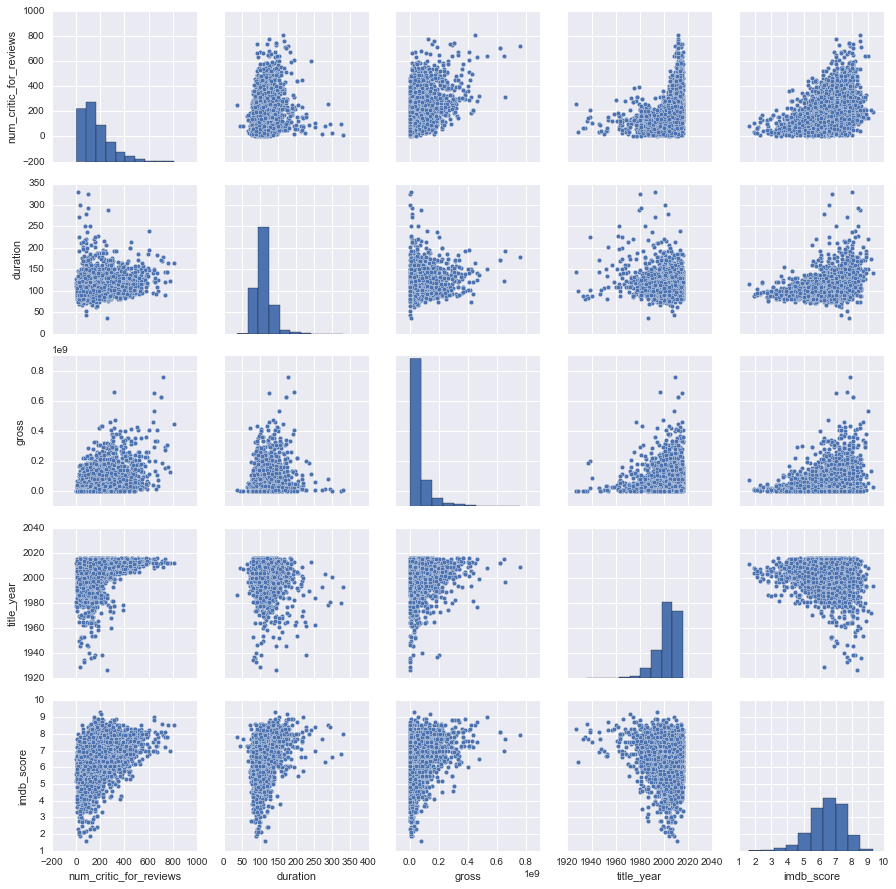

In [18]:
#Цель - узнать, как связаны между собой признаки
sns_plot = sns.pairplot(
    df[['num_critic_for_reviews', 'duration', 'gross', 'title_year', 'imdb_score']]);

In [21]:
#Цель - посмотреть как зависит пользовательский рейтинг фильма от его возрастного рейтинга
data = []

for rating in df.content_rating.unique():
    data.append(go.Box(y=df[df.content_rating==rating].imdb_score, name=rating))
iplot(data, show_link = False)

In [67]:
#Цель - визуализировать средний рейтинг по жанру и возрастному рейтингу 
df['most_genre'] = [i.split("|")[0] for i in df['genres']]
rating_genre_score = df.pivot_table(
                        index='content_rating', 
                        columns='most_genre', 
                        values='imdb_score', 
                        aggfunc=mean).fillna(0).applymap(float)

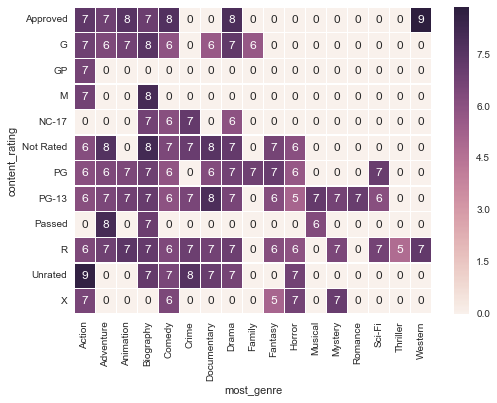

In [68]:
sns.heatmap(rating_genre_score, annot=True, fmt=".0f", linewidths=.5);

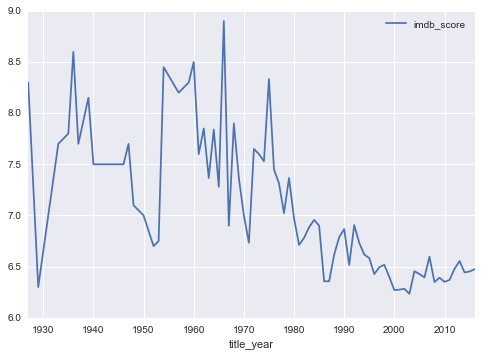

In [71]:
#Цель - узнать, как распределен средний рейтинг по годам выпуска фильма 
df[['title_year', 'imdb_score']].groupby('title_year').mean().plot();

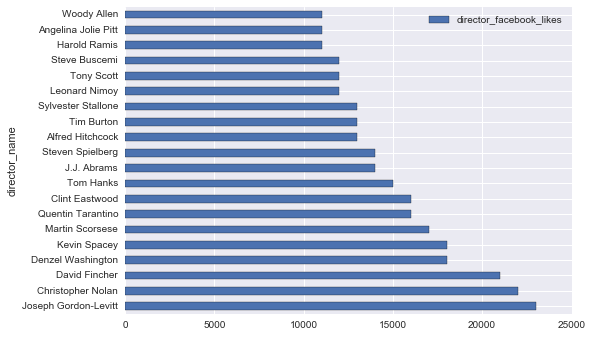

In [87]:
#Цель - найти 20 первых режисеров с максимальным количеством лайков на fb
df[['director_name', 'director_facebook_likes']].groupby('director_name').mean()\
.sort_values(['director_facebook_likes'], ascending=False)[:20]\
.plot(kind='barh')